<a href="https://colab.research.google.com/github/akpanitorobong/7088CEM---Artificial-Neural-Networks/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [97]:
# === Standard Libraries ===
import os  # For file and directory operations

# === Data Handling ===
import pandas as pd  # For loading, manipulating, and analyzing dataframes
import numpy as np  # For numerical operations, arrays, and mathematical functions

# === Visualization ===
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For enhanced data visualizations (e.g., heatmaps, distributions)

# === Preprocessing ===
from sklearn.impute import SimpleImputer  # To handle missing data
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler  # Scaling and normalization
from scipy.stats import skew  # To check and handle feature skewness

# === Train/Test Split and Dimensionality Reduction ===
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.decomposition import PCA  # Principal Component Analysis for dimensionality reduction

# === Evaluation Metrics ===
from sklearn.metrics import mean_squared_error, r2_score  # To evaluate regression performance

# === Models - Scikit-learn ===
from sklearn.neural_network import MLPRegressor  # Basic multilayer perceptron regression model

# === Models - Keras (TensorFlow backend) ===
import tensorflow as tf  # Base TensorFlow package
from tensorflow.keras.models import Sequential  # Sequential model for Keras
from tensorflow.keras.layers import Dense, Dropout, Input  # Core neural network layers
from tensorflow.keras.optimizers import Adam  # Optimizer for model training
from tensorflow.keras.regularizers import l2  # For L2 regularization (weight decay)
from tensorflow.keras.callbacks import EarlyStopping  # To stop training early if no improvement

# **Dataset**

In [98]:
base_url = "https://raw.githubusercontent.com/akpanitorobong/7088CEM---Artificial-Neural-Networks/main/data/"

df_2011 = pd.read_csv(base_url + "gt_2011.csv")
df_2012 = pd.read_csv(base_url + "gt_2012.csv")
df_2013 = pd.read_csv(base_url + "gt_2013.csv")
df_2014 = pd.read_csv(base_url + "gt_2014.csv")
df_2015 = pd.read_csv(base_url + "gt_2015.csv")

print("Files read successfully!")

# Preview first dataset
df_2011.head()

Files read successfully!


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [99]:
# Combine all years into one DataFrame (after loading them as df_2011 ... df_2015)
df_all = pd.concat([df_2011, df_2012, df_2013, df_2014, df_2015], ignore_index=True)
print("Combined all years")

Combined all years


# **Visualizations**

**Skewness check Histogram**

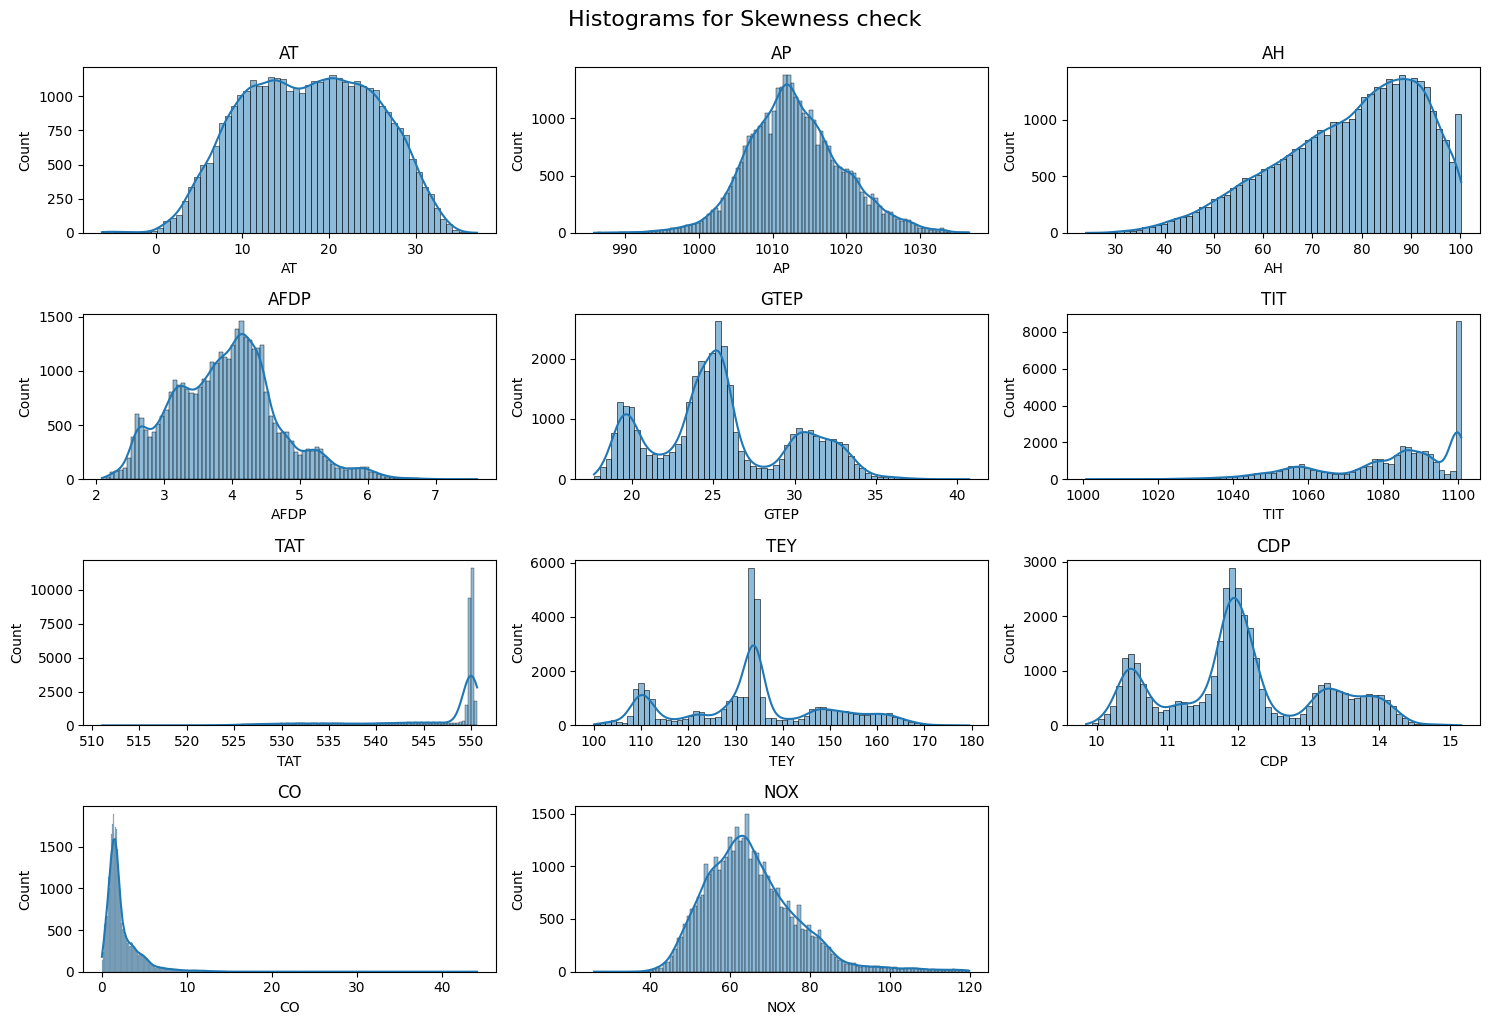

In [125]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_all.columns, 1):
  plt.subplot(4, 3, i)
  sns.histplot(df_all[column], kde=True)
  plt.title(column)
  plt.tight_layout()
plt.suptitle("Histograms for Skewness check", fontsize=16, y=1.02)
plt.show()

**Outliers Detection**

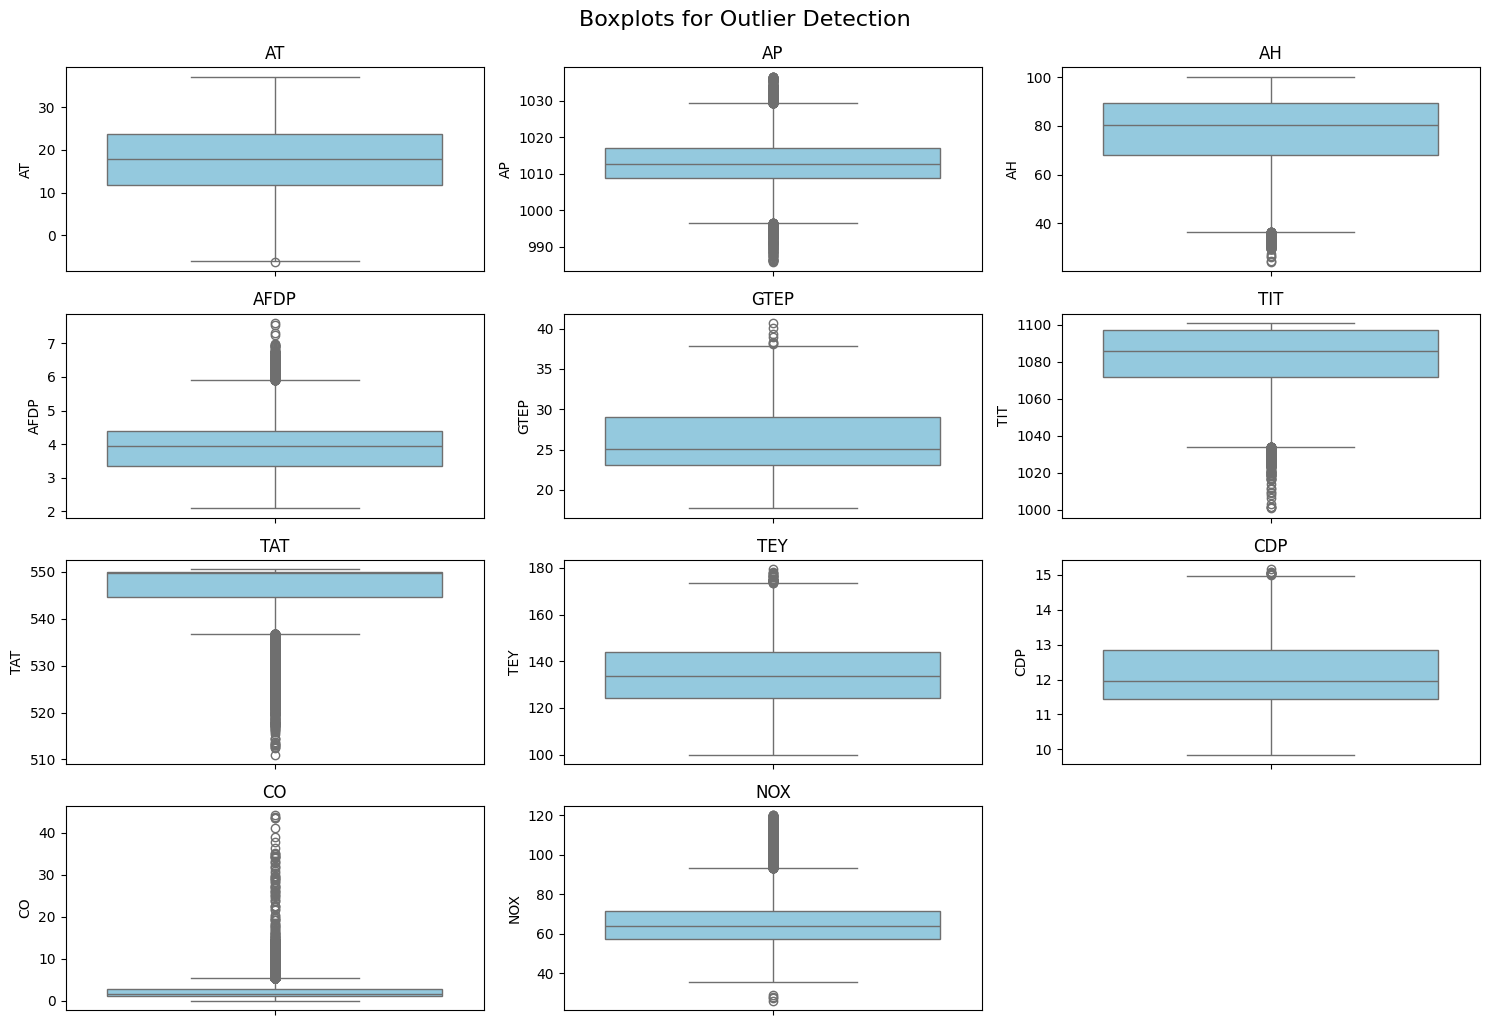

In [102]:
#Boxplots for Outlier Visualization ---
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_all.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df_all[column], color="skyblue")
    plt.title(column)
    plt.tight_layout()

plt.suptitle("Boxplots for Outlier Detection", fontsize=16, y=1.02)
plt.show()

# **Preprocessing**

**Missing Data**

In [103]:
print("Missing values:")
print(df_all.isnull().sum())

Missing values:
AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64


**Feature and label separation**

In [104]:
# Split into features and targets
X = df_all.drop(['CO', 'NOX'], axis=1)
y = df_all[["CO", "NOX"]]
print("Features and targets separated")

Features and targets separated


**Train/test split**

In [105]:
# Train/test split (chronological): 2011–2013 = first 22,191 rows
X_train, X_test = X.iloc[:22191], X.iloc[22191:]
y_train_df, y_test_df = y.iloc[:22191], y.iloc[22191:]
print("Train/test split done")

Train/test split done


**Power Transformations for Skewed Data**


In [106]:
# Power transformation
pt = PowerTransformer(method='yeo-johnson')
X_train_pt = pt.fit_transform(X_train)
X_test_pt = pt.transform(X_test)

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


**Min-Max Scaling**

In [107]:
# Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_pt)
X_test_scaled = scaler.transform(X_test_pt)

**PCA**

In [108]:
pca = PCA(n_components=0.95)  # Keep enough components to explain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f"Original shape: {X_train_scaled.shape}")
print(f"Reduced shape after PCA: {X_train_pca.shape}")

Original shape: (22191, 9)
Reduced shape after PCA: (22191, 5)


# **Models**

**Define, train and test MLP Regressor and Keras MLP models for both target variables**

In [109]:
predictions = {}
targets = ['CO', 'NOX']

for target in targets:
    print(f"\n=== {target} Prediction ===")

    y_train = y_train_df[target].values
    y_test = y_test_df[target].values

    # === 1. Scikit-learn MLPRegressor ===
    mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu',
                       solver='adam', max_iter=300, random_state=42)
    mlp.fit(X_train_pca, y_train)
    pred_sklearn = mlp.predict(X_test_pca)
    print("MLPRegressor - MSE:", mean_squared_error(y_test, pred_sklearn),
          "R²:", r2_score(y_test, pred_sklearn))

    # === 2. Keras MLP ===
    model_keras = Sequential([
        Dense(100, activation='relu', input_shape=(X_train_pca.shape[1],)),
        Dense(50, activation='relu'),
        Dense(1)
    ])
    model_keras.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    model_keras.fit(X_train_pca, y_train, epochs=100, batch_size=32, verbose=0)
    pred_keras = model_keras.predict(X_test_pca).flatten()
    print("Keras MLP - MSE:", mean_squared_error(y_test, pred_keras),
          "R²:", r2_score(y_test, pred_keras))

    # === Save for plotting ===
    predictions[target] = {
        'true': y_test,
        'keras': pred_keras,
        'sklearn': pred_sklearn,
        'keras': pred_keras
    }


=== CO Prediction ===
MLPRegressor - MSE: 1.9751908593592795 R²: 0.5879265448897277


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Keras MLP - MSE: 2.0098912919882044 R²: 0.5806871800964639

=== NOX Prediction ===


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MLPRegressor - MSE: 187.1828840137485 R²: -0.6732727117596031
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Keras MLP - MSE: 172.5104433575942 R²: -0.542112244315091


**Keras Optimization for NOx**

In [110]:
# Set up hyperparameter options
layer_configs = [(128, 64), (64, 32), (128, 64, 32)]
dropout_rates = [0.1, 0.2]
learning_rates = [0.001, 0.0005]

best_model = None
best_mse = float('inf')
best_config = None

X_train = X_train_pca
X_test = X_test_pca
y_train_nox = y_train_df["NOX"].values
y_test_nox = y_test_df["NOX"].values

for layers in layer_configs:
    for dropout_rate in dropout_rates:
        for lr in learning_rates:
            print(f"Training with layers={layers}, dropout={dropout_rate}, lr={lr}")

            model = Sequential()
            model.add(Input(shape=(X_train.shape[1],)))
            for units in layers:
                model.add(Dense(units, activation='relu', kernel_regularizer=l2(0.001)))
                model.add(Dropout(dropout_rate))
            model.add(Dense(1))  # Output layer

            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
            model.compile(optimizer=optimizer, loss=tf.keras.losses.Huber())

            es = EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')

            model.fit(
                X_train, y_train_nox,
                epochs=100,
                batch_size=64,
                validation_split=0.2,
                callbacks=[es],
                verbose=0
            )

            y_pred = model.predict(X_test).flatten()
            mse = mean_squared_error(y_test_nox, y_pred)
            r2 = r2_score(y_test_nox, y_pred)

            print(f"→ MSE: {mse:.4f}, R²: {r2:.4f}")

            if mse < best_mse:
                best_mse = mse
                best_model = model
                best_config = (layers, dropout_rate, lr)

print("\nBest Config:")
print(f"Layers: {best_config[0]}, Dropout: {best_config[1]}, Learning Rate: {best_config[2]}")
print(f"Best MSE: {best_mse:.4f}")


Training with layers=(128, 64), dropout=0.1, lr=0.001
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
→ MSE: 145.3321, R²: -0.2992
Training with layers=(128, 64), dropout=0.1, lr=0.0005
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
→ MSE: 160.5826, R²: -0.4355
Training with layers=(128, 64), dropout=0.2, lr=0.001
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
→ MSE: 133.4184, R²: -0.1927
Training with layers=(128, 64), dropout=0.2, lr=0.0005
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
→ MSE: 135.6781, R²: -0.2129
Training with layers=(64, 32), dropout=0.1, lr=0.001
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
→ MSE: 156.7906, R²: -0.4016
Training with layers=(64, 32), dropout=0.1, lr=0.0005
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
→ MSE: 147.4974, R²: -0.3185
Training with layers=(64, 32), dropout=0.2, lr=0.001
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
→ MSE: 144.8430, R²: -0.2948
Training with layers=(64, 32), dropout=0.2, lr=0.0005
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
→ MSE: 142.3990, R²: -0.2729
Training

**Keras For NOx Rerun**

In [111]:
# Unpack best hyperparameters
best_layers, best_dropout, best_lr = best_config

# Dictionary to store predictions
optimized_predictions = {}

# Build Keras model function
def build_optimized_model(input_dim, layers, dropout, lr):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    for units in layers:
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
    return model

# Train and evaluate model for each target
for target in targets:
  if target == 'NOX':
    print(f"\n=== Optimized Keras - {target} ===")
    y_train = y_train_df[target].values
    y_test = y_test_df[target].values

    model = build_optimized_model(X_train_pca.shape[1], best_layers, best_dropout, best_lr)
    model.fit(X_train_pca, y_train, epochs=100, batch_size=32, verbose=0)
    y_pred = model.predict(X_test_pca).flatten()

    optimized_predictions[target] = {
        'true': y_test,
        'pred': y_pred
    }

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MSE: {mse:.4f}, R²: {r2:.4f}")



=== Optimized Keras - NOX ===
455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE: 184.4481, R²: -0.6488


# **Post Model Visualization**

**CO Both Models**

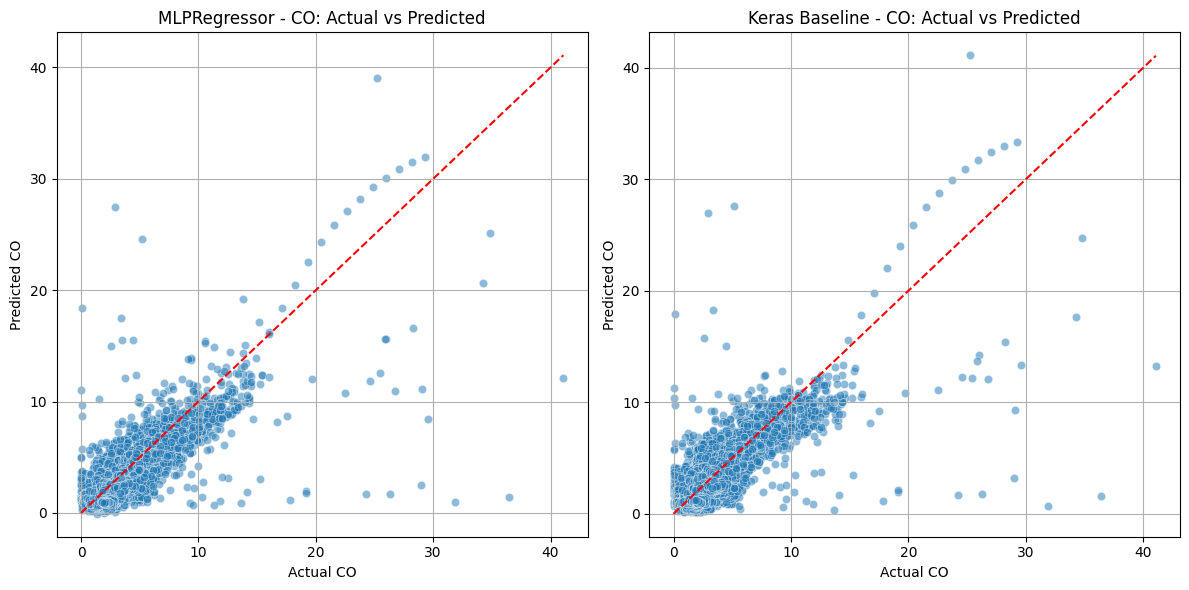

In [131]:
# MLPRegressor Predictions
y_true_co = y_test_df['CO'].values
y_pred_co_sklearn = predictions['CO']['sklearn'] # predicted CO from MLPRegressor

y_true_nox = y_test_df['NOX'].values
y_pred_nox_sklearn = predictions['NOX']['sklearn'] # predicted NOx from MLPRegressor

# Create side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# === CO Scatter ===
sns.scatterplot(ax=axes[0], x=y_true_co, y=y_pred_co_sklearn, alpha=0.5)
axes[0].plot([y_true_co.min(), y_true_co.max()], [y_true_co.min(), y_true_co.max()], 'r--')
axes[0].set_xlabel("Actual CO")
axes[0].set_ylabel("Predicted CO")
axes[0].set_title("MLPRegressor - CO: Actual vs Predicted")
axes[0].grid(True)

# === CO Scatter ===
sns.scatterplot(ax=axes[1], x=y_true_co, y=y_pred_co_keras, alpha=0.5)
axes[1].plot([y_true_co.min(), y_true_co.max()], [y_true_co.min(), y_true_co.max()], 'r--')
axes[1].set_xlabel("Actual CO")
axes[1].set_ylabel("Predicted CO")
axes[1].set_title("Keras Baseline - CO: Actual vs Predicted")
axes[1].grid(True)

plt.tight_layout()
plt.show()

**NOx Both Models**

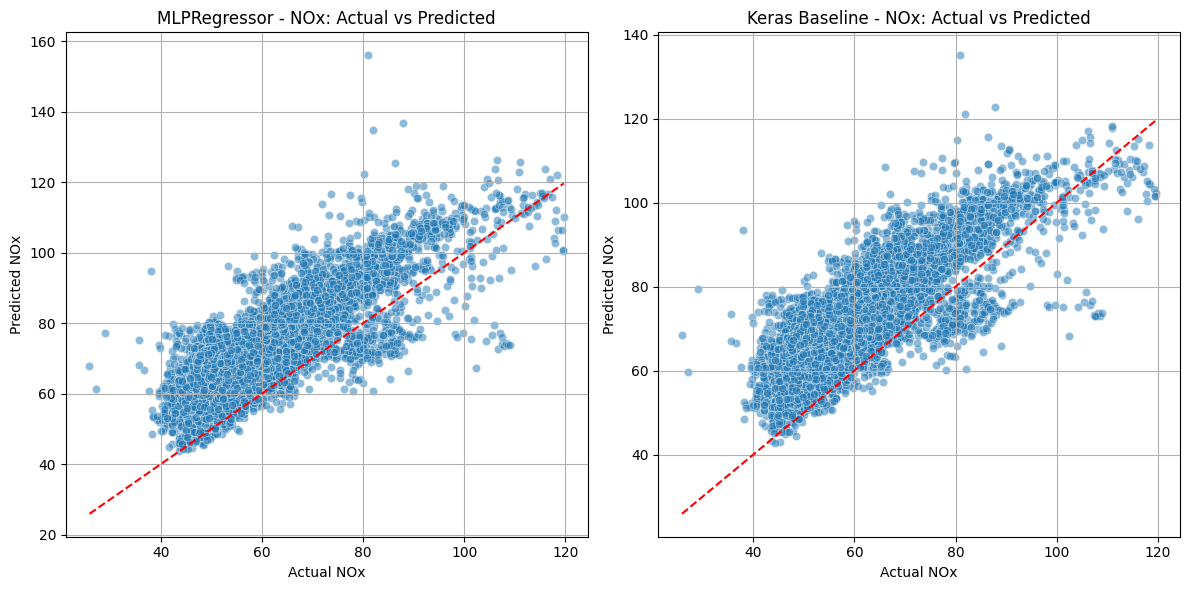

In [132]:
# Keras Baseline Predictions
y_pred_co_keras = predictions['CO']['keras']  # predicted CO from Keras model
y_pred_nox_keras =  predictions['NOX']['keras']  # predicted NOx from Keras model

# Create side-by-side scatter plots for Keras baseline
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# === NOx Scatter ===
sns.scatterplot(ax=axes[0], x=y_true_nox, y=y_pred_nox_sklearn, alpha=0.5)
axes[0].plot([y_true_nox.min(), y_true_nox.max()], [y_true_nox.min(), y_true_nox.max()], 'r--')
axes[0].set_xlabel("Actual NOx")
axes[0].set_ylabel("Predicted NOx")
axes[0].set_title("MLPRegressor - NOx: Actual vs Predicted")
axes[0].grid(True)

# === NOx Scatter ===
sns.scatterplot(ax=axes[1], x=y_true_nox, y=y_pred_nox_keras, alpha=0.5)
axes[1].plot([y_true_nox.min(), y_true_nox.max()], [y_true_nox.min(), y_true_nox.max()], 'r--')
axes[1].set_xlabel("Actual NOx")
axes[1].set_ylabel("Predicted NOx")
axes[1].set_title("Keras Baseline - NOx: Actual vs Predicted")
axes[1].grid(True)

plt.tight_layout()
plt.show()


**Keras (Optimized Model) — NOx Only**

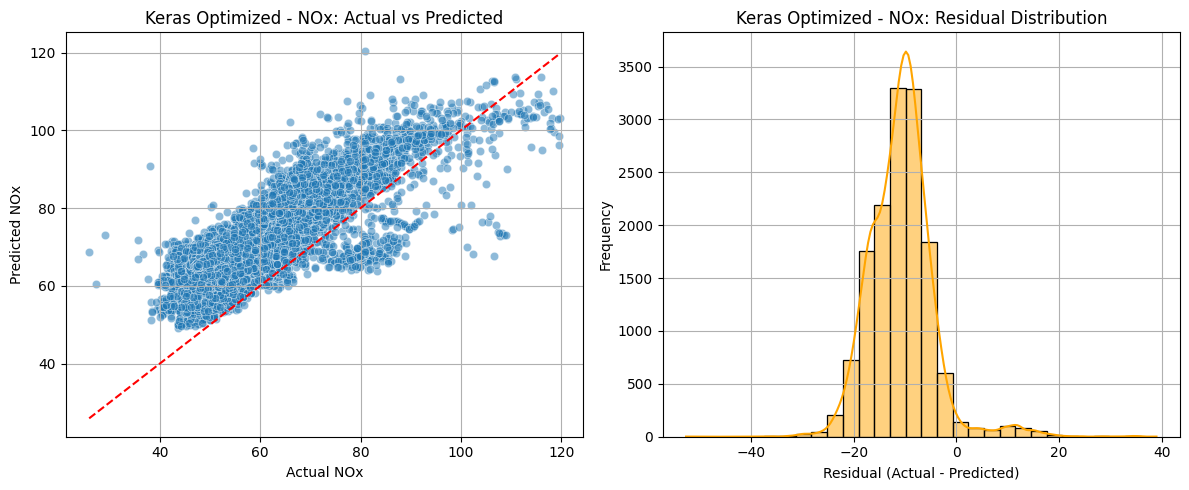

In [128]:
# Optimized Keras Predictions for NOx
y_pred_nox_optimized = nox_pred_optimized  # from best_config model

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# === NOx Scatter Plot ===
sns.scatterplot(ax=axes[0], x=y_true_nox, y=y_pred_nox_optimized, alpha=0.5)
axes[0].plot([y_true_nox.min(), y_true_nox.max()], [y_true_nox.min(), y_true_nox.max()], 'r--')
axes[0].set_xlabel("Actual NOx")
axes[0].set_ylabel("Predicted NOx")
axes[0].set_title("Keras Optimized - NOx: Actual vs Predicted")
axes[0].grid(True)

# === NOx Residual Plot ===
sns.histplot(residuals_nox, kde=True, bins=30, color='orange', ax=axes[1])
axes[1].set_title("Keras Optimized - NOx: Residual Distribution")
axes[1].set_xlabel("Residual (Actual - Predicted)")
axes[1].set_ylabel("Frequency")
axes[1].grid(True)

plt.tight_layout()
plt.show()